# Quick start

In [16]:
import numpy as np
import networkx as nx
import math
import time
import pickle as pkl
import scipy

import sys
#sys.path.insert(0, '/home/jaeger/B/Python')
#sys.path.insert(0, '/home/jaeger/B/Python/AHK')
sys.path.insert(0,'../')
import utils

from ahk import AHK_graphon
from ahk_generators import data_colors,ahk_sbm,sample_data


from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
### Define an AHK model representing a stochastic block model:

colprobs = np.array([0.2,0.3,0.5])
edgeprobs = np.array([[0.6,0.1,0.1],[0.1,0.9,0.1],[0.1,0.1,0.8]])

sbm=ahk_sbm(colprobs,edgeprobs,False)

In [18]:
### Sample random graphs from the model

minnodes=12
maxnodes=20
samplesize=10

sample=sample_data(sbm,samplesize,minnodes,maxnodes)

### these sampled graphs are now instances of utils.World
### They are converted to networkx graphs for plotting

'''
for g in sample:
    gnx=g.to_nx()
    nodecols=(list(gnx.nodes()[j]['features'] for j in gnx.nodes()))
    nx.draw_networkx(gnx,node_color=nodecols,cmap='Set3')
    plt.show()
'''

"\nfor g in sample:\n    gnx=g.to_nx()\n    nodecols=(list(gnx.nodes()[j]['features'] for j in gnx.nodes()))\n    nx.draw_networkx(gnx,node_color=nodecols,cmap='Set3')\n    plt.show()\n"

In [13]:
g.to_nx().edges(data=True)

AttributeError: 'Graph' object has no attribute 'to_nx'

In [14]:
sample = []
for i in range(10):
    g = nx.barabasi_albert_graph(15,1)
    for n in g.nodes():
        if nx.degree(g,n) > 2:
            g.nodes()[n]["features"] = "a"
        else:
            g.nodes()[n]["features"] = "b"
    for e in g.edges():
        g.edges()[e]["rel"] = "b0"
        
    tmp_dict = {"a":1,"b":2} 
    sample.append(utils.nx_to_world(g,featmaps=tmp_dict))

0 a


AttributeError: 'int' object has no attribute 'keys'

In [15]:
utils.nx_to_world(g)

/home/antonio/Desktop/PostDOC/Manfred/AHK/Jupyter/../utils.py:173: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  w.binaries[:,:,0]=nx.adjacency_matrix(nxg).todense()


In [ ]:
tmp_dict = {0:0,1:1}

In [ ]:
utils.nx_to_world(g,featmaps=tmp_dict)

## Learning

In [19]:
# Selecting the training data. Must be a list of graphs in the utils.World type.

traindata=sample

# Initializing a model. This requires to define the histogram partitioning of the [0,1] interval
# that the model uses
# The first argument in the constructor is the signature of the graphs we are dealing with, i.e.
# a specification of the attributes and relations


binbounds=utils.uni_bins(3)
model_learned=AHK_graphon(traindata[0].sig,binbounds)

# Defining settings:
settings={}
settings['num_pi_b']=50
settings['batchsize']=10
settings['soft']=0.01
settings['numepochs']=30
settings['learn_bins']=False
settings['early_stop']=5
settings['with_trace']=False

#Adam params:
settings['ad_alpha']=0.01
settings['ad_beta1']=0.99
settings['ad_beta2']=0.9
settings['ad_epsilon']=10e-8

settings['method']="adam"


In [20]:
# Random initialization and learning
model_learned.rand_init()
best,loglik,trace=model_learned.learn(settings,traindata)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1 log-lik:  -1077.2211421343316 early_stop:  5 noimprov:  0


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 2 log-lik:  -1035.4192932976214 early_stop:  5 noimprov:  0


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 3 log-lik:  -1016.4868983261761 early_stop:  5 noimprov:  0


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 4 log-lik:  -969.6203365628719 early_stop:  5 noimprov:  0


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 5 log-lik:  -967.4145528970722 early_stop:  5 noimprov:  0


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 6 log-lik:  -967.0822604298205 early_stop:  5 noimprov:  0


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 7 log-lik:  -965.5959363301714 early_stop:  5 noimprov:  0


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 8 log-lik:  -947.6522995222259 early_stop:  5 noimprov:  0


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 9 log-lik:  -926.0127321434993 early_stop:  5 noimprov:  0


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 10 log-lik:  -927.3439765143704 early_stop:  5 noimprov:  1


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 11 log-lik:  -931.6981962967018 early_stop:  5 noimprov:  2


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 12 log-lik:  -904.0209615120186 early_stop:  5 noimprov:  0


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 13 log-lik:  -917.8151927363299 early_stop:  5 noimprov:  1


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 14 log-lik:  -913.2393510864358 early_stop:  5 noimprov:  2


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 15 log-lik:  -911.0967708147537 early_stop:  5 noimprov:  3


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 16 log-lik:  -934.4744887555876 early_stop:  5 noimprov:  4


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 17 log-lik:  -919.9057725104635 early_stop:  5 noimprov:  5


In [ ]:
for g in [best.sample_world(10),best.sample_world(25),best.sample_world(5)]:
    gnx=g.to_nx()
    nodecols=(list(gnx.nodes()[j]['features'] for j in gnx.nodes()))
    nx.draw_networkx(gnx,node_color=nodecols,cmap='Set3')
    plt.show()

In [27]:
g = best.sample_world(10).to_nx()

g.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

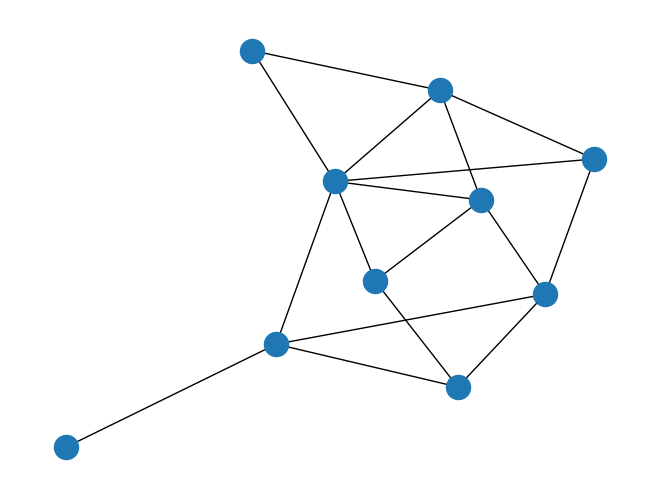

In [28]:
nx.draw(g)